In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import scipy.stats as stats
from enum import Enum

In [3]:
class EventType(Enum):
    ARRIVAL = 0
    DEPARTURE = 1

In [4]:
class Event(object):
    def __init__(self, event_type, time):
        self.event_type = event_type
        self.time = time

In [314]:
class EventList(object):
    def __init__(self):
        self.events = []
        
    def __len__(self):
        return len(self.events)
        
    def is_empty(self):
        return len(self) == 0
        
    def get_first(self):
        first = self.events[0]
        return first
    
    def enqueue(self, event):
        self.events.append(event)
        self.sort()
    
    def dequeue(self):
        self.sort()
        first = self.get_first()
        self.events = self.events[1:]
        return first
    
    def sort(self):
        self.events = sorted(self.events, key=lambda x: x.time)
        self.events = list(self.events)
        

In [315]:
def interarrival_time():
    return int(np.ceil(np.random.exponential(12)))

def service_time():
    return int(np.ceil(np.random.exponential(8)))

def counts_to_table(counts):
    values = set(counts)
    l = float(len(counts))
    probs = dict()
    for v in values:
        probs[v] = len(counts[counts == v])/l
    return probs
        

In [316]:
# assuming a FCFS queue
# we log the arrival time, time of service, and departure time for each
# customer who enters Rituals
customer_arrival = []
customer_departure = []
customer_service = []
num_customers_system = [] # logs num customers for any particular point in time
num_customers_line = []
server_utilization = 0
event_list = EventList()
first_arrival = interarrival_time()
event_list.enqueue(Event(EventType.ARRIVAL, first_arrival))

time_to_simulate = 60 * 24 * 5
free = True
customers = 0
t = 0

In [317]:

while t < time_to_simulate:
    next_event = event_list.dequeue()
    lt = t
    t = next_event.time
    if t > time_to_simulate:
        break
    diff = t - lt
    num_customers_line.extend([customers] * (diff - 1))
    if free:
        num_customers_system.extend([0] * (diff - 1))
    else:
        num_customers_system.extend([customers + 1] * (diff - 1))
    if next_event.event_type == EventType.ARRIVAL:
        customer_arrival.append(t)
        customers += 1
        if free:
            free = False
            customer_service.append(t)
            customers -= 1
            d_time = service_time() + t
            event_list.enqueue(Event(EventType.DEPARTURE, d_time))
        else:
            server_utilization += diff
        next_arrival_time = interarrival_time() + t
        arrival_event = Event(EventType.ARRIVAL, next_arrival_time)
        event_list.enqueue(arrival_event)
    elif next_event.event_type == EventType.DEPARTURE:
        customer_departure.append(t)
        if not free:
            server_utilization += diff
        free = True
        if customers > 0:
            free = False
            customer_service.append(t)
            customers -= 1
            next_dept_time = t + service_time()
            dept_event = Event(EventType.DEPARTURE, next_dept_time)
            event_list.enqueue(dept_event)

customer_service = np.array(customer_service)
customer_arrival = np.array(customer_arrival)
customer_departure = np.array(customer_departure)
num_customers_line = np.array(num_customers_line)
num_customers_system = np.array(num_customers_system)
    

In [318]:
# get array of times spent in the queue
time_spent_in_queue = customer_service - customer_arrival[0:len(customer_service)]

# get array of times spent in system
time_spent_in_system = customer_departure - customer_arrival[0:len(customer_departure)]

In [319]:
np.mean(num_customers_system)

2.0082385895534682

In [320]:
np.mean(num_customers_line)

1.3181743285549514

In [321]:
server_utilization / (time_to_simulate)

0.7155555555555555

(array([ 3191.,   871.,   775.,   477.,   321.,   160.,    72.,    63.,
           69.,    61.,     9.]),
 array([  0.        ,   0.90909091,   1.81818182,   2.72727273,
          3.63636364,   4.54545455,   5.45454545,   6.36363636,
          7.27272727,   8.18181818,   9.09090909,  10.        ]),
 <a list of 11 Patch objects>)

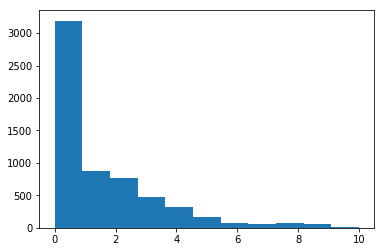

In [322]:
plt.hist(num_customers_line, bins=len(set(num_customers_line)))

(array([ 1881.,  1310.,   871.,   775.,   477.,   321.,   160.,    72.,
           63.,    69.,    70.]),
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.]),
 <a list of 11 Patch objects>)

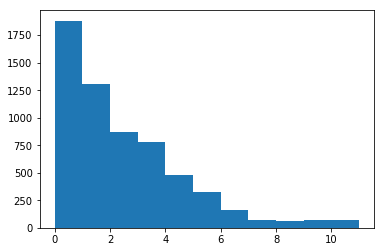

In [323]:
plt.hist(num_customers_system, bins=len(set(num_customers_line)))

In [324]:
counts_to_table(num_customers_system)

{0: 0.30993573900148297,
 1: 0.2158510463008733,
 2: 0.14351623002142033,
 3: 0.1276981380787609,
 4: 0.07859614434008898,
 5: 0.052891744933267426,
 6: 0.026363486571099028,
 7: 0.011863568956994563,
 8: 0.010380622837370242,
 9: 0.011369253583786456,
 10: 0.010051079255231504,
 11: 0.0014829461196243204}

In [325]:
counts_to_table(num_customers_line)

{0: 0.5257867853023562,
 1: 0.14351623002142033,
 2: 0.1276981380787609,
 3: 0.07859614434008898,
 4: 0.052891744933267426,
 5: 0.026363486571099028,
 6: 0.011863568956994563,
 7: 0.010380622837370242,
 8: 0.011369253583786456,
 9: 0.010051079255231504,
 10: 0.0014829461196243204}

In [326]:
np.mean(time_spent_in_queue)

16.70320404721754

In [327]:
np.mean(time_spent_in_system)

25.41722972972973

In [328]:
time_spent_in_queue

array([ 0, 27, 17, 17, 18, 19, 27, 28, 16, 11,  0,  0,  0,  7, 14,  0,  0,
        3,  3,  1,  0,  0,  0,  0,  0,  0,  5,  8,  6,  0,  0, 12, 16,  0,
       48, 34, 37, 30, 21, 49, 48, 44, 65, 69, 44, 53, 67, 91, 91, 90, 93,
       91, 84, 93, 88, 70, 59, 64, 36, 39, 51, 54, 50, 37, 44, 42,  5,  8,
       15, 31, 28, 28, 28, 11, 10, 19, 15, 13, 39, 22, 32, 32, 36, 23, 22,
        9, 25, 24, 12,  0,  2,  2, 14,  1,  0, 27, 11,  9,  0,  0,  7,  0,
       23, 14,  0,  0,  0,  0,  3,  7,  0,  0,  0,  0,  0,  0,  0,  0,  4,
        0,  0,  0,  1, 14, 41, 24, 11,  0,  2,  0,  0,  0,  6, 20, 17,  0,
        0,  0,  0,  2, 11, 17, 21, 17, 14,  0,  0, 23,  9,  9, 11, 11, 31,
       23, 23, 19,  2,  9, 13,  0,  0,  0,  0,  0,  0,  0,  3,  2,  0,  0,
        3,  0,  2,  8, 21,  7, 11,  7,  1, 20, 21, 29, 34, 28, 12,  9, 10,
        0,  1,  0,  0,  4,  0, 11, 15, 29, 27, 26,  4,  7, 11, 15, 30, 34,
       29, 45, 57, 54, 65, 34,  0,  0,  0,  2,  6, 21, 19, 21,  9,  0,  0,
        0,  0,  0,  0,  0

In [313]:
time_spent_in_system

array([ 8,  7, 21,  8,  8, 12, 14, 10,  6,  4,  1,  3,  4,  7,  4, 17, 26,
       20, 24, 25,  2,  1,  4,  2, 14, 30, 30, 30, 10,  2,  3,  7,  3,  5,
        6, 27, 63, 45, 33, 33, 36, 31, 27, 35, 40, 43, 45, 42, 41,  1,  5,
        9,  2, 26, 26, 28,  2,  3, 17,  7,  4, 20, 36, 41, 36, 34, 40, 37,
       41, 28, 28, 19, 45, 61, 61, 55, 54, 55, 55, 59, 44, 42, 45, 44, 48,
       48, 48, 52, 60, 57, 50, 28,  2, 17,  6,  4,  3,  7,  1,  6,  7,  7,
        7,  5, 32, 36, 28, 35, 24, 15, 15,  9, 10,  4,  7,  2,  4, 18, 37,
       26, 22, 23,  9, 18, 20,  8,  7, 22, 16,  5,  2, 15, 31, 43, 45, 12,
       28, 26, 26, 23,  1, 27, 37, 66, 64, 64, 54, 53, 31, 21, 16, 20, 23,
        1,  1,  3,  3, 11,  5, 15, 20, 27, 20, 16, 20, 14, 20, 17, 17,  2,
        2,  6, 17,  2,  3,  4, 18,  8,  5, 15, 10, 21,  2, 14,  2,  2,  1,
       17, 19, 27, 19, 13,  8, 12, 18, 19, 21, 25, 31, 12,  9,  7, 15, 14,
       11,  3,  5,  5, 17, 14, 28, 14,  3, 13,  8,  1,  4,  2,  6,  9,  2,
        2,  9,  6, 10, 46